In [5]:
import pandas as pd

df = pd.read_csv('../data/data_labeled_ohe.csv')

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               26457 non-null  int64  
 1   child_num                               26457 non-null  int64  
 2   income_total                            26457 non-null  float64
 3   asset                                   26457 non-null  int64  
 4   income_stability                        26457 non-null  int64  
 5   email                                   26457 non-null  int64  
 6   work_phone                              26457 non-null  int64  
 7   family_size                             26457 non-null  float64
 8   emp_years                               26457 non-null  int64  
 9   income_per_capita                       26457 non-null  float64
 10  hold_period                             26457 non-null  fl

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('credit', axis=1),
    df['credit'],
    test_size=0.2,
    random_state=42,
    stratify=df['credit']
)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=2)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf_clf = grid_search.best_estimator_
clf_pred = best_rf_clf.predict(X_test)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, clf_pred)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.72
Test set accuracy: 0.72


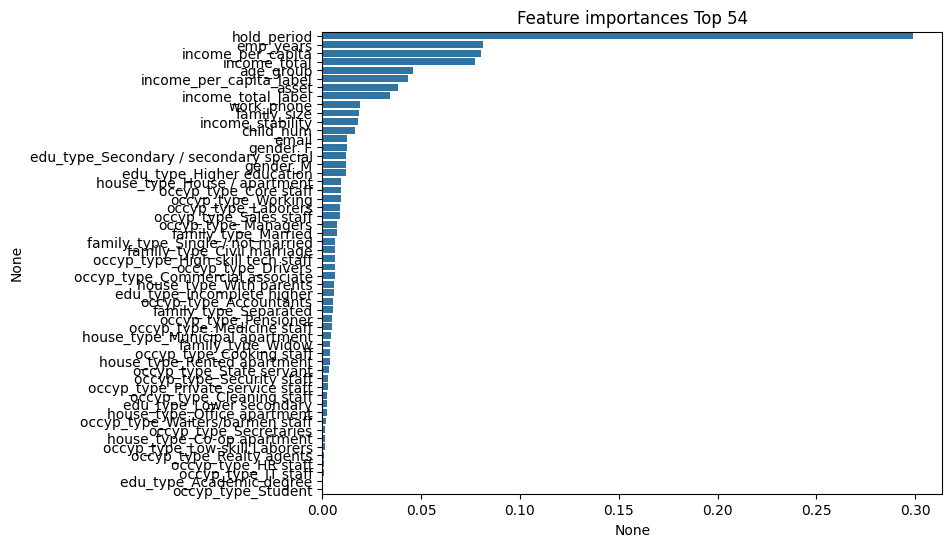

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):

  ftr_importances_values = model.feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(best_rf_clf, X_train.columns)